# Deep Q-Learning (DQN)

### 1. Motivation
+ In Q-Learning, we discretize the state spaces, and use a table to record and update the Q-function. 
+ However, most of interesting problems are too large to learn all action values in all states separately. Instead, we can learn a parameterized value function $Q(s,a|\theta_t)$.

### 2. Deep Q-Learning
Deep Q-learning uses a Deep Neural Network to approximate Q-function. 
+ For a given state $s$, it outputs a vector of action values $Q(s, \cdot|\theta_t)$. For an environment with $n$ state and an agent with $m$ actions, the neural network is a function from $R^n$ to $R^m$: $Q(s|\theta) \in \R^m$, where $Q(s,i)$ is the value of action $a_i$ at the state $s$. For short notation, we write $Q(s,a)$
+ Similar to the original Q-Learning, DQN updates the parameters after taking action $a_t$ in the state $s_t$, and observing the immediate reward $r_{t}$ and resulting state $s_{t+1}$. Differently, it updates the the NN's weights by Stochastic Gradient Descent (SGD) $\nabla _{\theta}$ . Concretely:

    $$\theta_{t+1} = \theta_t + \nabla _{\theta} Loss[Q_{target},Q(\theta_t)]=\theta_t + \alpha \frac{1}{2}\nabla _{\theta}(Q_{target}(s_{t+1},a|\theta) - Q(s_t,a_t|\theta))^2$$
    where the $Loss$ is Mean Square Error (MSELoss) as done in Q-Learning, and
    $$ Q_{target}=r_t + \gamma \max_a Q(s_{t+1},a, \theta) $$

### 3. What makes DQN work?
Two important ingredients of DQN algorithm as proposed by Mnih et. al. (2015) are the use of:
+ **Target Network**, with parameters $\theta^-$, is the same as the online network except that its parameters are copied every $\tau$ steps from the online network, so that $\theta^- \leftarrow \theta$ if $t \% \tau==0$, and keep fixed on all other steps. The target used by DQN is then:
    $$Q_{target}=r_t + \gamma \max_a Q(s_{t+1},a, \theta^-) $$
    In other words, the target network $\theta^-$ is the snapshot of $\theta$ for every $\tau$ steps.
+ **Experience Replay**: observed transitions $(s_t,a_t,r_t,s_{t+1})$ are stored for some time and **sampled uniformly** from this memory bank to update the network. This is because, DNN needs to be trained with mini-batch and SDG-like optimizer. If we use only a single sample, e.g the most current one, the network will be easily overfitted, and it cann't generalizes to all the states it saw in the past.  

### 4. DQN Pseudo Code
"DQN_pseudo.png"

<img src="DQN_pseudo.png" width="800" /> 

<p align="middle">
  <img src="DQN_pseudo.png" width="800" /> 
</p>

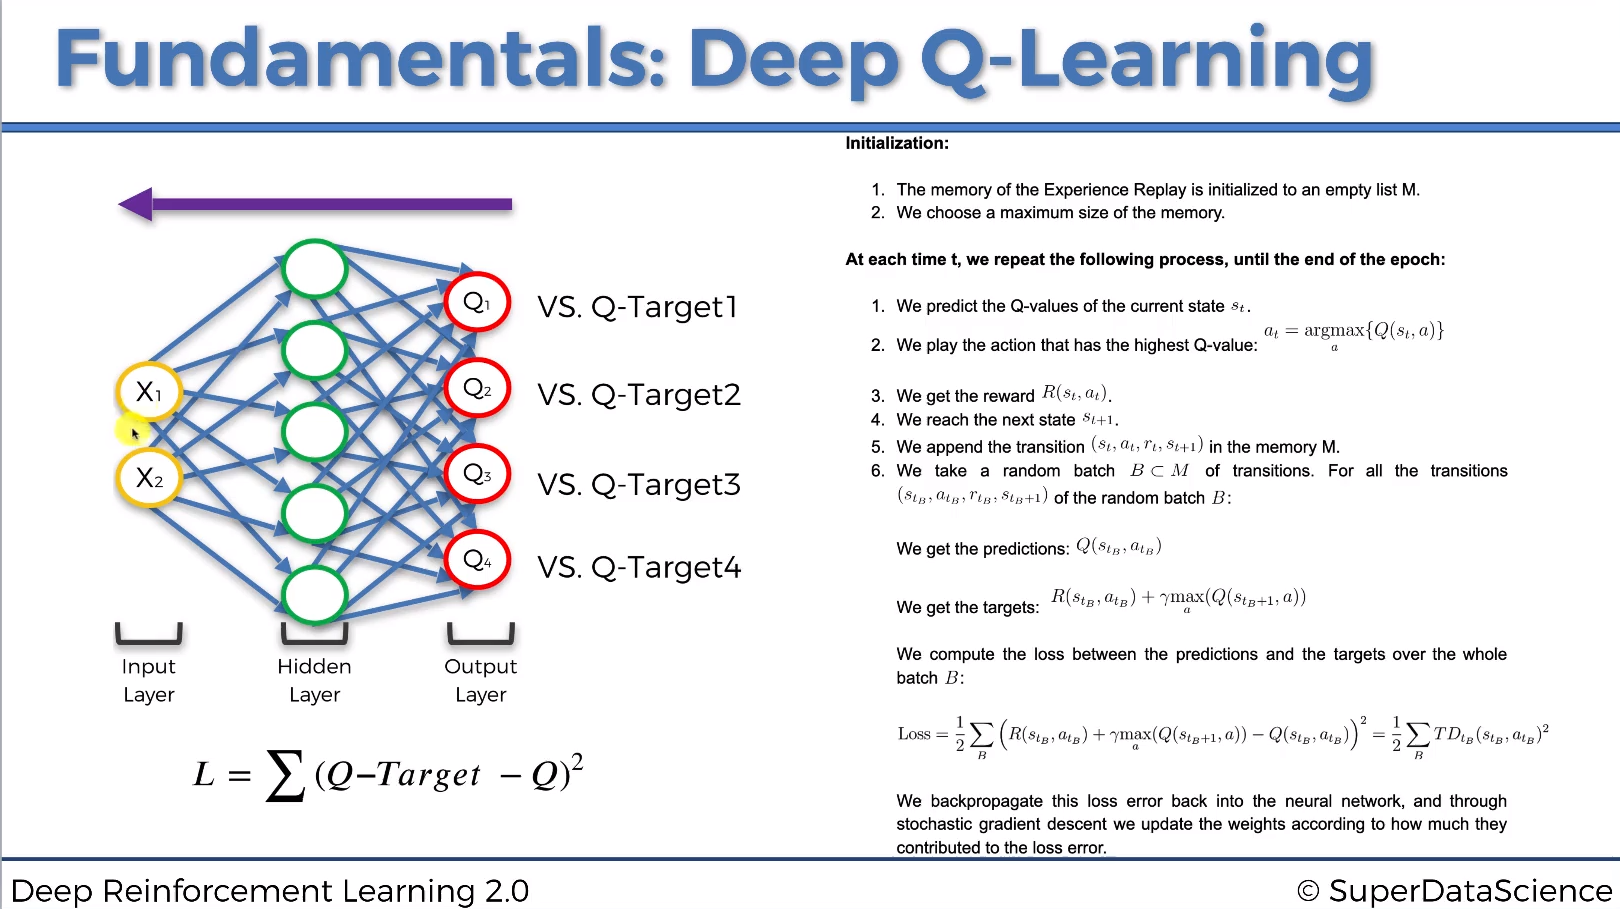

In [1]:
from IPython.display import Image
Image(filename="DQN_pseudo.png")